In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sas

In [2]:
FTrial = pd.read_csv('control_trial_results_dummy.csv')

In [3]:
FTrial = FTrial.drop('Unnamed: 0', axis=1, inplace=False)
FTrial.head()

,user_id,date,source,device,payee,browser,sex,age,industry,trial
0,1292,1,1,0,1,1,0,34,1,1
1,1821,1,1,0,1,1,0,33,1,0
2,1922,1,0,0,1,1,0,30,1,0
3,3039,1,1,1,1,1,0,47,1,0
4,4130,1,1,1,1,1,1,35,1,0


In [6]:
FTrial.tail(5)

,user_id,date,source,device,payee,browser,sex,age,industry,trial
181391,99997027,1,1,1,1,0,1,43,1,0
181392,99997987,1,1,1,1,0,0,32,1,0
181393,99998300,1,0,0,1,1,0,37,1,0
181394,99999080,1,1,1,1,1,0,35,1,0
181395,99999431,1,0,1,1,0,0,36,1,0


In [5]:
FTrial.shape

(181396, 10)

In [6]:
FTrial.columns

Index(['user_id', 'date', 'source', 'device', 'payee', 'browser', 'sex', 'age',
       'industry', 'trial'],
      dtype='object')

In [7]:
FTrial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181396 entries, 0 to 181395
Data columns (total 10 columns):
user_id     181396 non-null int64
date        181396 non-null int64
source      181396 non-null int64
device      181396 non-null int64
payee       181396 non-null int64
browser     181396 non-null int64
sex         181396 non-null int64
age         181396 non-null int64
industry    181396 non-null int64
trial       181396 non-null int64
dtypes: int64(10)
memory usage: 13.8 MB


In [ ]:
# convert int TV to object
FTrial['trial']=FTrial['trial'].apply(str)

In [8]:
FTrial['trial'].value_counts()

0    171401
1      9995
Name: trial, dtype: int64

# Conversion rate analysis

In [ ]:
# Filter FTrial to show only control users data
FTrial[FTrial['group']=='Control'].head(3)

In [ ]:
# Filter FTrial to show only test users data
FTrial[FTrial['group']=='Test'].head(3)

In [ ]:
def conversion_rate_plots (segment_by, filtered_data):
    
    #initialize subplots for 2 columns
    fig, (ax1, ax2)= plt.subplots(ncols=2, sharey=False, figsize=(14,6))
    
    #on the left, plot the distribution
    sas.countplot(x=segment_by, data=filtered_data, ax=ax1)
    
    #on the right, plot the conversion rate
    sas.barplot(x=segment_by,y='trial', data=filtered_data, ax=ax2)
    
    #Set title
    plt.title('conversion rate by {}'.format(segment_by.capitalize()))
    plt.show

In [ ]:
# Control users
conversion_rate_plots(segment_by='source', filtered_data=FTrial[FTrial['group']=='Control'])

In [ ]:
# Test users
conversion_rate_plots(segment_by='source', filtered_data=FTrial[FTrial['group']=='Test'])

In [ ]:
# All users
conversion_rate_plots(segment_by='source', filtered_data=FTrial)

In [ ]:
# Control users
conversion_rate_plots(segment_by='device',filtered_data=FTrial[FTrial['group']=='Control'])

In [ ]:
# Test users
conversion_rate_plots(segment_by='device',filtered_data=FTrial[FTrial['group']=='Test'])

In [ ]:
# All users
conversion_rate_plots(segment_by='device',filtered_data=FTrial)

In [ ]:
# Control users
conversion_rate_plots(segment_by='browser',filtered_data=FTrial[FTrial['group']=='Control'])

In [ ]:
# Test users
conversion_rate_plots(segment_by='browser',filtered_data=FTrial[FTrial['group']=='Test'])

In [ ]:
# All users
conversion_rate_plots(segment_by='browser')

In [ ]:
# Control users
conversion_rate_plots(segment_by='industry_code',filtered_data=FTrial[FTrial['group']=='Control'])

In [ ]:
# Test users
conversion_rate_plots(segment_by='industry_code',filtered_data=FTrial[FTrial['group']=='Test'])

In [ ]:
# All users
conversion_rate_plots(segment_by='industry_code')

In [ ]:
conversion_rate_plots(segment_by='age')

# Fix Imbalance data

In [4]:
# Split into training/test set

from sklearn.model_selection import train_test_split

X = FTrial[['user_id', 'date', 'source', 'device', 'payee', 'browser', 'sex', 'age',
       'industry']]
y = FTrial[['trial']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
target_count = y_train.trial.value_counts()
target_count

0    137053
1      8063
Name: trial, dtype: int64

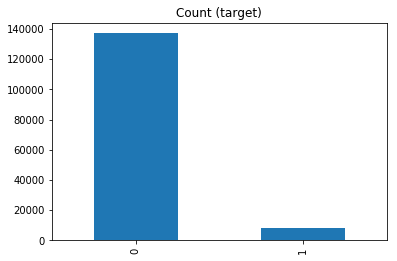

In [11]:
target_count.plot(kind='bar', title='Count (target)')

In [13]:
!pip install xgboost

     |████████████████████████████████| 142.8MB 5.6kB/s eta 0:00:011  |██                              | 8.7MB 2.4MB/s eta 0:00:56                        | 10.6MB 2.4MB/s eta 0:00:55                         | 14.7MB 27.7MB/s eta 0:00:05                  | 36.6MB 45.4MB/s eta 0:00:03MB/s eta 0:00:13     |███████████████▏                | 67.8MB 6.8MB/s eta 0:00:12�███████████▋               | 74.0MB 9.4MB/s eta 0:00:08███████████████████████▏      | 112.4MB 30.1MB/s eta 0:00:02     |███████████████████████████▉    | 124.2MB 30.1MB/s eta 0:00:01     |█████████████████████████████▋  | 132.3MB 13.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 94.67%


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
# with just 1 input feature - should reduce accuracy

model = XGBClassifier()
model.fit(X_train[['browser']], y_train)
y_pred = model.predict(X_test[['browser']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 94.67%


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[34348     0]
 [ 1932     0]]


In [ ]:
# Class count
count_class_0, count_class_1 = y_train.trial.value_counts()

# Divide by class
df_class_0 = y_train[y_train['trial'] == 0]
df_class_1 = y_train[y_train['trial'] == 1]

In [ ]:
y_train.trial.value_counts()

# Random under-sampling

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.trial.value_counts())

df_test_under.trial.value_counts().plot(kind='bar', title='Count (trial)')

In [ ]:
df_test_under.tail()

# Python imbalanced-learn module

In [18]:
!pip install imblearn

     |████████████████████████████████| 174kB 3.6MB/s eta 0:00:01
     |████████████████████████████████| 296kB 8.2MB/s eta 0:00:01     |██████▊                         | 61kB 20.0MB/s eta 0:00:01
     |████████████████████████████████| 6.6MB 7.7MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
You should consider upgrading via the 'pip install --upgrade pip' command.


# Random under-sampling and over-sampling with imbalanced-learn

In [19]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, _ = rus.fit_sample(X, y)

ImportError: cannot import name 'MultiOutputMixin'

# Other methods to handle imbalance data as per: https://elitedatascience.com/imbalanced-classes

# 1. Up-sample Minority Class

First, we'll import the resampling module from Scikit-Learn

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

1) First, we'll separate observations from each class into different DataFrames.
2) Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
3) Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

Here's the code:

In [8]:
training_set = pd.concat([X_train, y_train], axis=1)

In [9]:
training_set.shape

(145116, 10)

In [10]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = training_set[training_set.trial==0]
df_minority = training_set[training_set.trial==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=137053,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.trial.value_counts()

1    137053
0    137053
Name: trial, dtype: int64

In [11]:
df_upsampled.shape

(274106, 10)

As you can see, the new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1.

Let's train another model using Logistic Regression, this time on the balanced dataset:

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate input features (X) and target variable (y)
y = df_upsampled.trial
X = df_upsampled.drop('trial', axis=1)
 
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on test set
pred_y_1 = clf_1.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1) )

[0]
0.9467475192943771


# 2. Down-sample Majority Class

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. Here are the steps:

1) First, we'll separate observations from each class into different DataFrames.

2) Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.

3) Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

Here's the code:

In [13]:
# Separate majority and minority classes
df_majority = training_set[training_set.trial==0]
df_minority = training_set[training_set.trial==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=8063,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.trial.value_counts()

1    8063
0    8063
Name: trial, dtype: int64

This time, the new DataFrame has fewer observations than the original, and the ratio of the two classes is now 1:1.

Again, let's train a model using Logistic Regression:

In [14]:
# Separate input features (X) and target variable (y)
y = df_downsampled.trial
X = df_downsampled.drop('trial', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on test set
pred_y_2 = clf_2.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_2) )

[0]
0.9467475192943771


# 3. Change Your Performance Metric

In [15]:
from sklearn.metrics import roc_auc_score

# down sampled model
prob_y_2 = clf_2.predict_proba(X)   # Predict class probabilities
prob_y_2 = [p[1] for p in prob_y_2]  # Keep only the positive class
print( roc_auc_score(y, prob_y_2) )

# up sampled model
prob_y_1 = clf_1.predict_proba(X)   # Predict class probabilities
prob_y_1 = [p[1] for p in prob_y_1]  # Keep only the positive class
print( roc_auc_score(y, prob_y_1) )

0.5007215978953045
0.5007215978953045


Note: if you got an AUROC of 0.47, it just means you need to invert the predictions because Scikit-Learn is misinterpreting the positive class. AUROC should be >= 0.5

# 4. Penalize Algorithms (Cost-Sensitive Training)

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM. Let's train a model using Penalized-SVM on the original imbalanced dataset:

In [ ]:
from sklearn.svm import SVC

# Train model
clf_3 = SVC(kernel='rbf', 
            class_weight='balanced', # penalize mistakes on the minority class by an amount proportional to how under-represented it
            probability=True)  # enable probability estimates for SVM algorithms
 
clf_3.fit(X_train, y_train)
 
# Predict on test set
pred_y_3 = clf_3.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_3) )
# 0.688
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X_train)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_train, prob_y_3) )

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 5. Use Tree-Based Algorithms

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we'll jump right into those:

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Train model
clf_4 = RandomForestClassifier(n_estimators=100, random_state=1)
clf_4.fit(X_train, y_train)
 
# Predict on test set
pred_y_4 = clf_4.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
# 0.9744
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )

conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_y_4)
print('Confusion matrix:\n', conf_mat)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0 1]
0.9114939360529217
0.9131996173523311
Confusion matrix:
 [[32994  1354]
 [ 1857    75]]


Wow! 92% accuracy and 90% AUROC

No wonder, tree ensembles have become very popular because they perform extremely well on many real-world problems

In [6]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_y_4)

print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[33345  1003]
 [ 1868    64]]


In [7]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Train model
clf_5 = AdaBoostClassifier()
clf_5.fit(X_train, y_train)
 
# Predict on test set
pred_y_5 = clf_5.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_5) )
# 0.9744
 
# What about AUROC?
prob_y_5 = clf_5.predict_proba(X)
prob_y_5 = [p[1] for p in prob_y_5]
print( roc_auc_score(y, prob_y_5) )

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_y_5)
print('Confusion matrix:\n', conf_mat)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1]
0.9467199558985667
0.5227033674829491
Confusion matrix:
 [[34347     1]
 [ 1932     0]]


In [8]:
# GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

# Train model
clf_6 = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
clf_6.fit(X_train, y_train)
 
# Predict on test set
pred_y_6 = clf_6.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_6 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_6) )
# 0.9744
 
# What about AUROC?
prob_y_6 = clf_6.predict_proba(X)
prob_y_6 = [p[1] for p in prob_y_6]
print( roc_auc_score(y, prob_y_6) )

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_y_6)
print('Confusion matrix:\n', conf_mat)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1]
0.9467199558985667
0.5293029887853069
Confusion matrix:
 [[34347     1]
 [ 1932     0]]
